# Capstone Part 2e - Classical ML Models (Mean Mels with Offset)
___
## Setup

In [1]:
# Basic packages
import numpy as np
import pandas as pd

# For splitting the data into training and test sets
from sklearn.model_selection import train_test_split

# For scaling the data as necessary
from sklearn.preprocessing import StandardScaler

# For doing principal component analysis as necessary
from sklearn.decomposition import PCA

# For visualizations
import matplotlib.pyplot as plt
%matplotlib inline

# For building a variety of models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# For hyperparameter optimization
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# For caching pipeline and grid search results
from tempfile import mkdtemp

# For model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# For getting rid of warning messages
import warnings
warnings.filterwarnings('ignore')

# Loading in the finished dataframe from part 1
df = pd.read_csv('C:/Users/Patrick/Documents/Capstone Data/ravdess_mel_offset.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,Gender,Emotion
0,1.533443e-10,4.470215e-11,8.070570e-11,2.146172e-10,4.451442e-10,4.280263e-10,2.788707e-10,1.879692e-09,1.174269e-09,4.461908e-10,...,3.662752e-08,8.307025e-08,9.287401e-08,3.056497e-08,4.678518e-09,5.241251e-09,6.313334e-09,7.005036e-09,male,neutral
1,1.188707e-09,3.779748e-10,2.234186e-10,6.680412e-10,6.218913e-09,1.137445e-08,2.683028e-09,5.531596e-09,8.906017e-09,6.461679e-09,...,2.217372e-08,3.826104e-09,1.010611e-09,7.145892e-10,3.149462e-10,2.505838e-10,1.273010e-10,1.725840e-10,male,neutral
2,6.123937e-08,8.660994e-08,1.589899e-07,6.396412e-08,4.406861e-08,6.402577e-08,5.034104e-08,7.215107e-08,2.666949e-08,1.086904e-08,...,1.322439e-09,1.381340e-09,1.323247e-10,2.768844e-11,1.122044e-09,1.865057e-09,4.243676e-10,4.917393e-10,male,neutral
3,4.613280e-08,2.906938e-08,3.552248e-08,5.806047e-08,4.948989e-08,5.540470e-08,2.852813e-08,3.038411e-08,4.256698e-08,2.405028e-08,...,1.889469e-09,1.447878e-08,4.330400e-08,7.822125e-08,3.754572e-08,1.115205e-08,9.865569e-09,2.300178e-08,male,neutral
4,2.184508e-11,2.776947e-10,2.597032e-10,1.652612e-10,2.990570e-10,2.350421e-10,9.289343e-10,5.398018e-10,2.240118e-11,2.210581e-10,...,9.282968e-10,2.595139e-09,2.578465e-09,4.286336e-10,1.172365e-09,9.211989e-10,1.238382e-09,4.182768e-10,male,calm


___
# Building Models for Classifying Gender (Regardless of Emotion)

In [2]:
# Splitting the dataframe into features and target
X = df.iloc[:, :-2]
g = df['Gender']

The convention is to name the target variable 'y', but I will be declaring many different target variables throughout the notebook, so I opted for 'g' for simplicity instead of 'y_g' or 'y_gen', for example.

In [3]:
# Splitting the data into training and test sets
X_train, X_test, g_train, g_test = train_test_split(X, g, test_size=0.3, stratify=g, random_state=1)

In [4]:
# Checking the shapes
print(X_train.shape)
print(X_test.shape)
print(g_train.shape)
print(g_test.shape)

(1006, 130)
(432, 130)
(1006,)
(432,)


I want to build a simple, initial classifier to get a sense of the performances I might get in more optimized models. To this end, I will build a logistic regression model without doing any cross-validation or hyperparameter optimization.

In [5]:
# Instantiate the model
initial_logreg = LogisticRegression()

# Fit to training set
initial_logreg.fit(X_train, g_train)

# Score on training set
print(f'Model accuracy on training set: {initial_logreg.score(X_train, g_train)*100}%')

# Score on test set
print(f'Model accuracy on test set: {initial_logreg.score(X_test, g_test)*100}%')

Model accuracy on training set: 66.30218687872762%
Model accuracy on test set: 62.96296296296296%


___
# Building Models for Classifying Emotion for Males

In [6]:
# Making a new dataframe that contains only male recordings
male_df = df[df['Gender'] == 'male'].reset_index().drop('index', axis=1)

In [7]:
# Splitting the dataframe into features and target
Xm = male_df.iloc[:, :-2]
em = male_df['Emotion']

In [8]:
# Splitting the data into training and test sets
Xm_train, Xm_test, em_train, em_test = train_test_split(Xm, em, test_size=0.3, stratify=em, random_state=1)

In [9]:
# Checking the shapes
print(Xm_train.shape)
print(Xm_test.shape)
print(em_train.shape)
print(em_test.shape)

(502, 130)
(216, 130)
(502,)
(216,)


As before, I will try building an initial model.

In [10]:
# Instantiate the model
initial_logreg_em = LogisticRegression()

# Fit to training set
initial_logreg_em.fit(Xm_train, em_train)

# Score on training set
print(f'Model accuracy on training set: {initial_logreg_em.score(Xm_train, em_train)*100}%')

# Score on test set
print(f'Model accuracy on test set: {initial_logreg_em.score(Xm_test, em_test)*100}%')

Model accuracy on training set: 45.21912350597609%
Model accuracy on test set: 27.314814814814813%


In [12]:
# Having initial_logreg_em make predictions based on the test set features
em_pred = initial_logreg_em.predict(Xm_test)

# Building the confusion matrix as a dataframe
emotions = ['angry', 'calm', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
em_confusion_df = pd.DataFrame(confusion_matrix(em_test, em_pred))
em_confusion_df.columns = [f'Predicted {emotion}' for emotion in emotions]
em_confusion_df.index = [f'Actual {emotion}' for emotion in emotions]
em_confusion_df

,Predicted angry,Predicted calm,Predicted disgusted,Predicted fearful,Predicted happy,Predicted neutral,Predicted sad,Predicted surprised
Actual angry,13,2,0,5,3,0,3,3
Actual calm,0,24,1,0,1,0,2,0
Actual disgusted,1,13,7,2,1,0,3,2
Actual fearful,5,5,1,4,5,0,2,7
Actual happy,3,9,3,2,6,0,3,3
Actual neutral,0,10,1,0,0,0,1,2
Actual sad,2,22,1,0,2,0,1,1
Actual surprised,0,12,2,2,8,0,1,4


In [13]:
# Classification report
print(classification_report(em_test, em_pred))

              precision    recall  f1-score   support

       angry       0.54      0.45      0.49        29
        calm       0.25      0.86      0.38        28
   disgusted       0.44      0.24      0.31        29
     fearful       0.27      0.14      0.18        29
       happy       0.23      0.21      0.22        29
     neutral       0.00      0.00      0.00        14
         sad       0.06      0.03      0.04        29
   surprised       0.18      0.14      0.16        29

    accuracy                           0.27       216
   macro avg       0.25      0.26      0.22       216
weighted avg       0.26      0.27      0.24       216



In [14]:
# PCA on unscaled features

# Instantiate PCA and fit to Xm_train
pca = PCA().fit(Xm_train)

# Transform Xm_train
Xm_train_pca = pca.transform(Xm_train)

# Transform Xm_test
Xm_test_pca = pca.transform(Xm_test)

In [15]:
# Standard scaling

# Instantiate the scaler and fit to Xm_train
scaler = StandardScaler().fit(Xm_train)

# Transform Xm_train
Xm_train_scaled = scaler.transform(Xm_train)

# Transform Xm_test
Xm_test_scaled = scaler.transform(Xm_test)

In [16]:
# PCA on scaled features

# Instantiate PCA and fit to Xm_train_scaled
pca_scaled = PCA().fit(Xm_train_scaled)

# Transform Xm_train_scaled
Xm_train_scaled_pca = pca_scaled.transform(Xm_train_scaled)

# Transform Xm_test_scaled
Xm_test_scaled_pca = pca_scaled.transform(Xm_test_scaled)

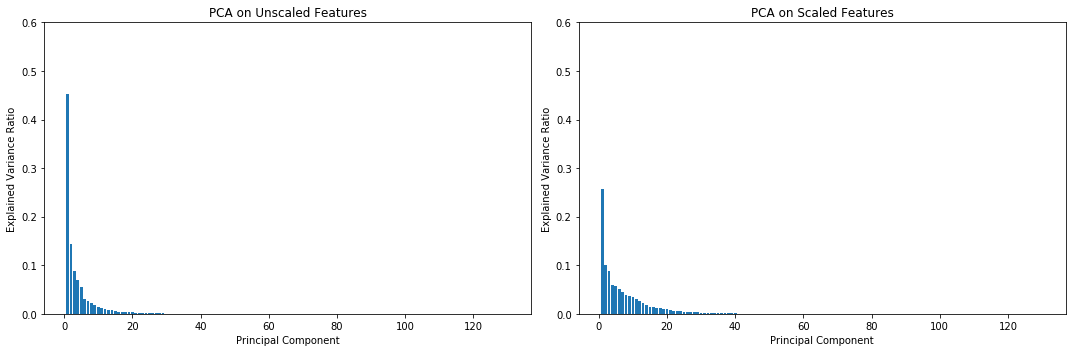

In [17]:
# Plot the explained variance ratios

plt.subplots(1, 2, figsize = (15, 5))

# Unscaled
plt.subplot(1, 2, 1)
plt.bar(np.arange(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA on Unscaled Features')
plt.ylim(top = 0.6) # Equalizing the y-axes

# Scaled
plt.subplot(1, 2, 2)
plt.bar(np.arange(1, len(pca_scaled.explained_variance_ratio_)+1), pca_scaled.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA on Scaled Features')
plt.ylim(top = 0.6) # Equalizing the y-axes

plt.tight_layout()
plt.show()

In [18]:
# Examining the variances
var_df = pd.DataFrame(male_df.var()).T
var_df

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,0.000001,0.000003,0.000001,0.000019,0.000186,0.000318,0.000042,0.000005,5.270101e-07,1.731025e-07,...,0.114849,0.17577,0.278263,0.107821,0.055318,0.085634,0.141539,0.094595,0.075233,0.070858


How much variance is explained by certain numbers of unscaled and scaled principal components? This will help me determine how many principal components to try in my grid searches later.

In [19]:
# Unscaled
num_components = [131, 31, 21, 16]
for n in num_components:
    print(f'Variance explained by {n-1} unscaled principal components: {np.round(np.sum(pca.explained_variance_ratio_[:n])*100, 2)}%')

Variance explained by 130 unscaled principal components: 100.0%
Variance explained by 30 unscaled principal components: 99.58%
Variance explained by 20 unscaled principal components: 98.29%
Variance explained by 15 unscaled principal components: 96.66%


In [21]:
# Scaled
num_components = [131, 31, 21, 16]
for n in num_components:
    print(f'Variance explained by {n-1} scaled principal components: {np.round(np.sum(pca_scaled.explained_variance_ratio_[:n])*100, 2)}%')

Variance explained by 130 scaled principal components: 100.0%
Variance explained by 30 scaled principal components: 98.41%
Variance explained by 20 scaled principal components: 94.46%
Variance explained by 15 scaled principal components: 89.31%


In [22]:
# Cache
cachedir = mkdtemp()

# Pipeline (these values are placeholders)
my_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('dim_reducer', PCA()), ('model', LogisticRegression())], memory=cachedir)

In [23]:
# Parameter grid for log reg
logreg_param_grid = [
    # l1 without PCA
    # unscaled and scaled * 9 regularization strengths = 18 models
    {'scaler': [None, StandardScaler()], 'dim_reducer': [None], 'model': [LogisticRegression(penalty='l1', n_jobs=-1)],
     'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
    
    # l1 with PCA
    # unscaled and scaled * 3 PCAs * 9 regularization strengths = 54 models
    {'scaler': [None, StandardScaler()], 'dim_reducer': [PCA()], 'dim_reducer__n_components': [15, 20, 30],
     'model': [LogisticRegression(penalty='l1', n_jobs=-1)], 'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
    
    # l2 (default) without PCA
    # unscaled and scaled * 9 regularization strengths = 18 models
    {'scaler': [None, StandardScaler()], 'dim_reducer': [None], 'model': [LogisticRegression(solver='lbfgs', n_jobs=-1)],
     'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
    
    # l2 (default) with PCA
    # unscaled and scaled * 3 PCAs * 9 regularization strengths = 54 models
    {'scaler': [None, StandardScaler()], 'dim_reducer': [PCA()], 'dim_reducer__n_components': [15, 20, 30],
     'model': [LogisticRegression(solver='lbfgs', n_jobs=-1)], 'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
]

# Instantiate the log reg grid search
logreg_grid_search = GridSearchCV(estimator=my_pipeline, param_grid=logreg_param_grid, cv=5, n_jobs=-1, verbose=5)

In [24]:
# Fit the log reg grid search
fitted_logreg_grid_em = logreg_grid_search.fit(Xm_train, em_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  79 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 169 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 339 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 517 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 10.6min finished


In [25]:
# What was the best log reg?
fitted_logreg_grid_em.best_estimator_

Pipeline(memory='C:\\Users\\Patrick\\AppData\\Local\\Temp\\tmpsg6220ix',
         steps=[('scaler', None),
                ('dim_reducer',
                 PCA(copy=True, iterated_power='auto', n_components=20,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('model',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=-1, penalty='l1',
                                    random_state=None, solver='warn',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [26]:
print(f"The best log reg's accuracy on the training set: {fitted_logreg_grid_em.score(Xm_train, em_train)*100}%")
print(f"The best log reg's accuracy on the test set: {fitted_logreg_grid_em.score(Xm_test, em_test)*100}%")

The best log reg's accuracy on the training set: 34.06374501992032%
The best log reg's accuracy on the test set: 26.851851851851855%


In [28]:
# Parameter grid for SVM
svm_param_grid = [
    # unscaled and scaled * 9 regularization strengths = 18 models
    {'scaler': [None, StandardScaler()], 'dim_reducer': [None], 'model': [SVC()], 'model__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
    
    # unscaled and scaled * 3 PCAs * 9 regularization strengths = 54 models
    {'scaler': [None, StandardScaler()], 'dim_reducer': [PCA()], 'dim_reducer__n_components': [15, 20, 30], 'model': [SVC()],
     'model__C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
]

# Instantiate the SVM grid search
svm_grid_search = GridSearchCV(estimator=my_pipeline, param_grid=svm_param_grid, cv=5, n_jobs=-1, verbose=5)

In [29]:
# Fit the SVM grid search
fitted_svm_grid_em = svm_grid_search.fit(Xm_train, em_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    8.2s finished


In [30]:
# What was the best SVM?
fitted_svm_grid_em.best_estimator_

Pipeline(memory='C:\\Users\\Patrick\\AppData\\Local\\Temp\\tmpsg6220ix',
         steps=[('scaler', None),
                ('dim_reducer',
                 PCA(copy=True, iterated_power='auto', n_components=30,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('model',
                 SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [31]:
print(f"The best SVM's accuracy on the training set: {fitted_svm_grid_em.score(Xm_train, em_train)*100}%")
print(f"The best SVM's accuracy on the test set: {fitted_svm_grid_em.score(Xm_test, em_test)*100}%")

The best SVM's accuracy on the training set: 66.93227091633466%
The best SVM's accuracy on the test set: 32.407407407407405%


In [33]:
# Parameter grid for KNN
knn_param_grid = [
    # unscaled and scaled * 10 Ks = 20 models
    {'scaler': [None, StandardScaler()], 'dim_reducer': [None], 'model': [KNeighborsClassifier(n_jobs=-1)], 'model__n_neighbors': np.arange(3, 22, 2)},
    
    # unscaled and scaled * 3 PCAs * 10 Ks = 60 models
    {'scaler': [None, StandardScaler()], 'dim_reducer': [PCA()], 'dim_reducer__n_components': [15, 20, 30], 'model': [KNeighborsClassifier(n_jobs=-1)],
     'model__n_neighbors': np.arange(3, 22, 2)}
]

# Instantiate the grid search
knn_grid_search = GridSearchCV(estimator=my_pipeline, param_grid=knn_param_grid, cv=5, n_jobs=-1, verbose=5)

In [34]:
# Fit the KNN grid search
fitted_knn_grid_em = knn_grid_search.fit(Xm_train, em_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   15.0s finished


In [35]:
# What was the best KNN model?
fitted_knn_grid_em.best_estimator_

Pipeline(memory='C:\\Users\\Patrick\\AppData\\Local\\Temp\\tmpsg6220ix',
         steps=[('scaler', None),
                ('dim_reducer',
                 PCA(copy=True, iterated_power='auto', n_components=15,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('model',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbors=3, p=2,
                                      weights='uniform'))],
         verbose=False)

In [36]:
print(f"The best KNN model's accuracy on the training set: {fitted_knn_grid_em.score(Xm_train, em_train)*100}%")
print(f"The best KNN model's accuracy on the test set: {fitted_knn_grid_em.score(Xm_test, em_test)*100}%")

The best KNN model's accuracy on the training set: 61.15537848605578%
The best KNN model's accuracy on the test set: 30.555555555555557%


In [37]:
# Parameter grid for random forest (scaling is unnecessary)
rf_param_grid = [
    # 5 numbers of estimators * 5 max depths = 25 models
    {'scaler': [None], 'dim_reducer': [None], 'model': [RandomForestClassifier(n_jobs=-1)], 'model__n_estimators': np.arange(100, 501, 100),
     'model__max_depth': np.arange(5, 26, 5)},
    
    # 3 PCAs * 5 numbers of estimators * 5 max depths = 75 models
    {'scaler': [None], 'dim_reducer': [PCA()], 'dim_reducer__n_components': [15, 20, 30], 'model': [RandomForestClassifier(n_jobs=-1)],
     'model__n_estimators': np.arange(100, 501, 100), 'model__max_depth': np.arange(5, 26, 5)}
]

# Instantiate the rf grid search
rf_grid_search = GridSearchCV(estimator=my_pipeline, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=5)

In [38]:
# Fit the rf grid search
fitted_rf_grid_em = rf_grid_search.fit(Xm_train, em_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.3min finished


In [39]:
# What was the best rf?
fitted_rf_grid_em.best_estimator_

Pipeline(memory='C:\\Users\\Patrick\\AppData\\Local\\Temp\\tmpsg6220ix',
         steps=[('scaler', None), ('dim_reducer', None),
                ('model',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=20,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=200, n_jobs=-1,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [40]:
print(f"The best random forest's accuracy on the training set: {fitted_rf_grid_em.score(Xm_train, em_train)*100}%")
print(f"The best random forest's accuracy on the test set: {fitted_rf_grid_em.score(Xm_test, em_test)*100}%")

The best random forest's accuracy on the training set: 100.0%
The best random forest's accuracy on the test set: 42.129629629629626%


___
# Building Models for Classifying Emotion for Females

In [41]:
# Making a new dataframe that contains only female recordings
female_df = df[df['Gender'] == 'female'].reset_index().drop('index', axis=1)

In [42]:
# Splitting the dataframe into features and target
Xf = female_df.iloc[:, :-2]
ef = female_df['Emotion']

In [43]:
# Splitting the data into training and test sets
Xf_train, Xf_test, ef_train, ef_test = train_test_split(Xf, ef, test_size=0.3, stratify=ef, random_state=1)

In [44]:
# Checking the shapes
print(Xf_train.shape)
print(Xf_test.shape)
print(ef_train.shape)
print(ef_test.shape)

(504, 130)
(216, 130)
(504,)
(216,)


Here is an initial model:

In [45]:
# Instantiate the model
initial_logreg_ef = LogisticRegression()

# Fit to training set
initial_logreg_ef.fit(Xf_train, ef_train)

# Score on training set
print(f'Model accuracy on training set: {initial_logreg_ef.score(Xf_train, ef_train)*100}%')

# Score on test set
print(f'Model accuracy on test set: {initial_logreg_ef.score(Xf_test, ef_test)*100}%')

Model accuracy on training set: 46.62698412698413%
Model accuracy on test set: 31.944444444444443%


In [46]:
# Having initial_logreg_ef make predictions based on the test set features
ef_pred = initial_logreg_ef.predict(Xf_test)

# Building the confusion matrix as a dataframe
emotions = ['angry', 'calm', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
ef_confusion_df = pd.DataFrame(confusion_matrix(ef_test, ef_pred))
ef_confusion_df.columns = [f'Predicted {emotion}' for emotion in emotions]
ef_confusion_df.index = [f'Actual {emotion}' for emotion in emotions]
ef_confusion_df

,Predicted angry,Predicted calm,Predicted disgusted,Predicted fearful,Predicted happy,Predicted neutral,Predicted sad,Predicted surprised
Actual angry,10,2,2,2,3,0,1,9
Actual calm,0,27,0,0,1,0,0,1
Actual disgusted,0,14,11,0,0,0,2,2
Actual fearful,4,2,3,4,4,0,4,8
Actual happy,4,4,3,4,3,0,4,7
Actual neutral,0,13,0,0,0,0,0,1
Actual sad,5,22,0,0,1,0,1,0
Actual surprised,1,7,0,2,2,0,3,13


In [47]:
# Classification report
print(classification_report(ef_test, ef_pred))

              precision    recall  f1-score   support

       angry       0.42      0.34      0.38        29
        calm       0.30      0.93      0.45        29
   disgusted       0.58      0.38      0.46        29
     fearful       0.33      0.14      0.20        29
       happy       0.21      0.10      0.14        29
     neutral       0.00      0.00      0.00        14
         sad       0.07      0.03      0.05        29
   surprised       0.32      0.46      0.38        28

    accuracy                           0.32       216
   macro avg       0.28      0.30      0.26       216
weighted avg       0.30      0.32      0.27       216



In [48]:
# PCA on unscaled features

# Instantiate PCA and fit to Xf_train
pca = PCA().fit(Xf_train)

# Transform Xf_train
Xf_train_pca = pca.transform(Xf_train)

# Transform Xf_test
Xf_test_pca = pca.transform(Xf_test)

In [49]:
# Standard scaling

# Instantiate the scaler and fit to Xf_train
scaler = StandardScaler().fit(Xf_train)

# Transform Xf_train
Xf_train_scaled = scaler.transform(Xf_train)

# Transform Xf_test
Xf_test_scaled = scaler.transform(Xf_test)

In [50]:
# PCA on scaled features

# Instantiate PCA and fit to Xf_train_scaled
pca_scaled = PCA().fit(Xf_train_scaled)

# Transform Xf_train_scaled
Xf_train_scaled_pca = pca_scaled.transform(Xf_train_scaled)

# Transform Xf_test_scaled
Xf_test_scaled_pca = pca_scaled.transform(Xf_test_scaled)

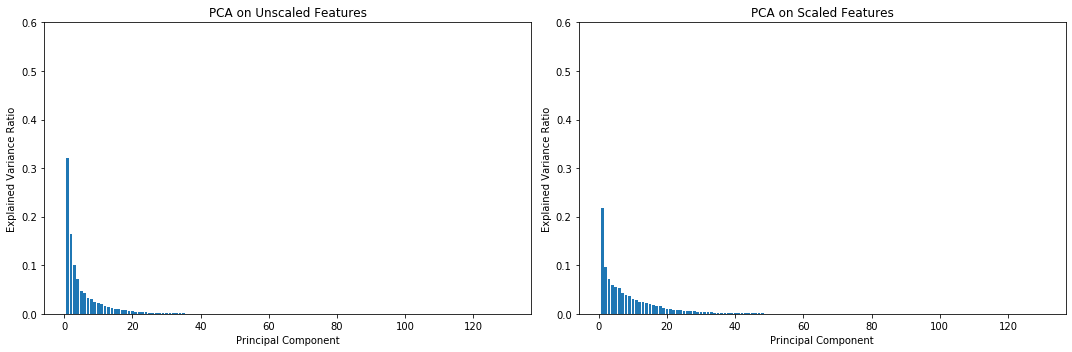

In [51]:
# Plot the explained variance ratios

plt.subplots(1, 2, figsize = (15, 5))

# Unscaled
plt.subplot(1, 2, 1)
plt.bar(np.arange(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA on Unscaled Features')
plt.ylim(top = 0.6) # Equalizing the y-axes

# Scaled
plt.subplot(1, 2, 2)
plt.bar(np.arange(1, len(pca_scaled.explained_variance_ratio_)+1), pca_scaled.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA on Scaled Features')
plt.ylim(top = 0.6) # Equalizing the y-axes

plt.tight_layout()
plt.show()

How much variance is explained by certain numbers of unscaled and scaled principal components? This will help me determine how many principal components to try in my grid searches later.

In [52]:
# Unscaled
num_components = [131, 31, 21, 16]
for n in num_components:
    print(f'Variance explained by {n-1} unscaled principal components: {np.round(np.sum(pca.explained_variance_ratio_[:n])*100, 2)}%')

Variance explained by 130 unscaled principal components: 100.0%
Variance explained by 30 unscaled principal components: 99.07%
Variance explained by 20 unscaled principal components: 96.72%
Variance explained by 15 unscaled principal components: 93.56%


In [53]:
# Scaled
num_components = [131, 31, 21, 16]
for n in num_components:
    print(f'Variance explained by {n-1} scaled principal components: {np.round(np.sum(pca_scaled.explained_variance_ratio_[:n])*100, 2)}%')

Variance explained by 130 scaled principal components: 100.0%
Variance explained by 30 scaled principal components: 96.31%
Variance explained by 20 scaled principal components: 90.65%
Variance explained by 15 scaled principal components: 84.21%


Like before, I will now do a grid search for each classifier type, with five-fold cross-validation to optimize the hyperparameters.

In [54]:
# Fit the log reg grid search
fitted_logreg_grid_ef = logreg_grid_search.fit(Xf_train, ef_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 187 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 414 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 11.0min finished


In [55]:
# What was the best log reg?
fitted_logreg_grid_ef.best_estimator_

Pipeline(memory='C:\\Users\\Patrick\\AppData\\Local\\Temp\\tmpsg6220ix',
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('dim_reducer',
                 PCA(copy=True, iterated_power='auto', n_components=20,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('model',
                 LogisticRegression(C=100, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=-1, penalty='l1',
                                    random_state=None, solver='warn',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [56]:
print(f"The best log reg's accuracy on the training set: {fitted_logreg_grid_ef.score(Xf_train, ef_train)*100}%")
print(f"The best log reg's accuracy on the test set: {fitted_logreg_grid_ef.score(Xf_test, ef_test)*100}%")

The best log reg's accuracy on the training set: 41.07142857142857%
The best log reg's accuracy on the test set: 33.33333333333333%


In [58]:
# Fit the SVM grid search
fitted_svm_grid_ef = svm_grid_search.fit(Xf_train, ef_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   14.7s finished


In [59]:
# What was the best SVM?
fitted_svm_grid_ef.best_estimator_

Pipeline(memory='C:\\Users\\Patrick\\AppData\\Local\\Temp\\tmpsg6220ix',
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('dim_reducer',
                 PCA(copy=True, iterated_power='auto', n_components=30,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('model',
                 SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [60]:
print(f"The best SVM's accuracy on the training set: {fitted_svm_grid_ef.score(Xf_train, ef_train)*100}%")
print(f"The best SVM's accuracy on the test set: {fitted_svm_grid_ef.score(Xf_test, ef_test)*100}%")

The best SVM's accuracy on the training set: 78.17460317460318%
The best SVM's accuracy on the test set: 34.72222222222222%


In [62]:
# Fit the KNN grid search
fitted_knn_grid_em = knn_grid_search.fit(Xm_train, em_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   12.9s finished


In [63]:
# What was the best KNN model?
fitted_knn_grid_em.best_estimator_

Pipeline(memory='C:\\Users\\Patrick\\AppData\\Local\\Temp\\tmpsg6220ix',
         steps=[('scaler', None),
                ('dim_reducer',
                 PCA(copy=True, iterated_power='auto', n_components=15,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('model',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbors=3, p=2,
                                      weights='uniform'))],
         verbose=False)

In [64]:
print(f"The best KNN model's accuracy on the training set: {fitted_knn_grid_em.score(Xm_train, em_train)*100}%")
print(f"The best KNN model's accuracy on the test set: {fitted_knn_grid_em.score(Xm_test, em_test)*100}%")

The best KNN model's accuracy on the training set: 61.15537848605578%
The best KNN model's accuracy on the test set: 30.555555555555557%


In [65]:
# Fit the rf grid search
fitted_rf_grid_em = rf_grid_search.fit(Xm_train, em_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.2min finished


In [66]:
# What was the best rf?
fitted_rf_grid_em.best_estimator_

Pipeline(memory='C:\\Users\\Patrick\\AppData\\Local\\Temp\\tmpsg6220ix',
         steps=[('scaler', None), ('dim_reducer', None),
                ('model',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=20,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=500, n_jobs=-1,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [67]:
print(f"The best random forest's accuracy on the training set: {fitted_rf_grid_em.score(Xm_train, em_train)*100}%")
print(f"The best random forest's accuracy on the test set: {fitted_rf_grid_em.score(Xm_test, em_test)*100}%")

The best random forest's accuracy on the training set: 100.0%
The best random forest's accuracy on the test set: 40.74074074074074%
